In [1]:
# Random Forest with model based feature selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\merged_fs_train_data_2.csv")

In [4]:
damage_labels = [1, 2, 3]

In [5]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [6]:
print(min_count)

25124


In [7]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [8]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,count_families,damage_grade
51865,27,533,1424,3,10,11,9,t,u,x,x,s,s,0,0,0,1,0,1,1
64445,20,1359,7526,2,20,11,5,t,r,q,f,q,s,0,1,0,0,1,1,1
60147,6,1253,3073,4,15,19,12,t,i,x,v,s,s,0,0,0,0,0,1,1
4829,26,264,8233,2,0,6,5,t,w,n,f,x,s,0,0,0,0,1,1,1
259325,10,405,10686,1,0,4,2,t,r,n,f,j,s,0,1,0,0,0,1,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])

In [11]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,count_families,damage_grade
51865,27,533,1424,3,10,11,9,2,3,2,3,2,2,0,0,0,1,0,1,1
64445,20,1359,7526,2,20,11,5,2,2,1,0,1,2,0,1,0,0,1,1,1
60147,6,1253,3073,4,15,19,12,2,1,2,2,2,2,0,0,0,0,0,1,1
4829,26,264,8233,2,0,6,5,2,4,0,0,3,2,0,0,0,0,1,1,1
259325,10,405,10686,1,0,4,2,2,2,0,0,0,2,0,1,0,0,0,1,1


In [16]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,19].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.78      0.83      0.80      4924
           2       0.58      0.54      0.56      5067
           3       0.70      0.71      0.70      5084

    accuracy                           0.69     15075
   macro avg       0.69      0.69      0.69     15075
weighted avg       0.69      0.69      0.69     15075



In [21]:
#Model based Feature Selection

from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(classifier, threshold='median')
fs.fit(X_train,y_train)
fs_features = fs.transform(X_train)

In [22]:
# Print the indices of the selected features
print(fs.get_support(indices=True))

[ 0  1  2  4  5  6  8  9 10 14]


In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']


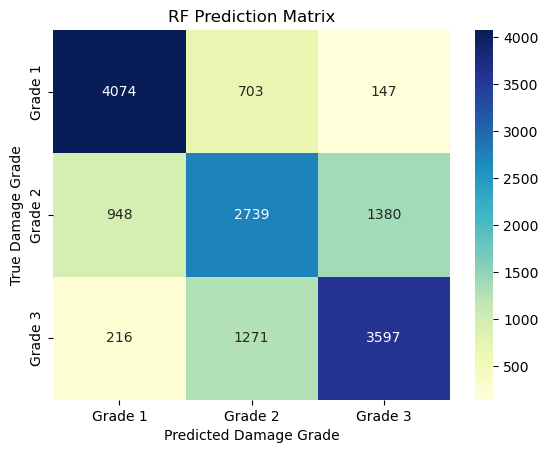

In [24]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
plt.title("RF Prediction Matrix")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()

In [25]:
from sklearn.tree import export_text

In [26]:
features_data = train_data.drop(columns=['damage_grade'], axis=1)

In [18]:
# # Print out the decision trees in the random forest
# for i, tree in enumerate(classifier.estimators_):
#     r = export_text(tree, feature_names=features_data.columns.tolist())
#     print(f"Decision Tree {i}:\n{r}")

# tree = classifier.estimators_[0]
# r = export_text(tree, feature_names=features_data.columns.tolist())
# print(f"Decision Tree {0}:\n{r}")